In [96]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [97]:
#THE DATA CONTAINS THE CUSTOMER DATA OF TELECOM SERVICE PROVIDER ,IT SHOWS CUSTOMER CHURNS 



df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [99]:
df.shape

(7043, 21)

In [100]:
df.info() # MOST OF THE DATA IS OF OBJECT TYPE 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
df.isnull().sum()    # THERE ARE NO NULL  VALUES THATS GREAT 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [102]:
df.describe() 
# TENURE IS IN MONTHS SO 75% OF CUSTOMERS ARE OF LESS THAN 55MONTHS TENURE 
#50% CUSTOMERS PAY LESS THAN 70 A MONTH AND 25% PAYS MORE THAN 89 A MONTH 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [103]:
# WE CAN SEE THAT TOTAL CHARGES COLUMN IS NUMERIC BUTIT IS NOT BEEN DISPLAYED IN DESCRIBE FUNCTION SO WE WILL 
# CONVERT THAT INTO FLOAT OR INTERGER AS IT IS OBJECT DTYPES 


df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

df.isnull().sum()    # so now we can see that there are 11 null values ,so we will just drop them as they are very less 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [104]:
df.dropna(how='any',inplace=True)  # dropping the 11 null values 

In [105]:
# WE CAN SEE THAT CUSTOMER ID IS NOT OF ANY USE AS IT DOES NOT AFFECT THE DATA SO WE WILL DROP IT 

df.drop(columns=['customerID'],inplace=True,axis=1)

In [106]:
df.head(2)  # data after droping the column

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [107]:
# VALUE COUNTS 
df['gender'].value_counts()  # it is balanced 

Male      3549
Female    3483
Name: gender, dtype: int64

In [108]:
df['Churn'].value_counts()  # most of the data is of NO

No     5163
Yes    1869
Name: Churn, dtype: int64

In [109]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

Text(0, 0.5, 'churn')

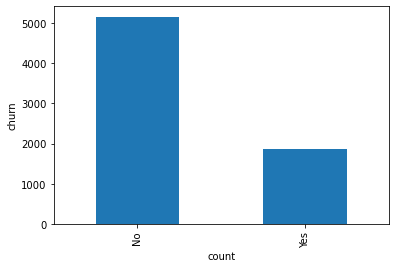

In [110]:
df['Churn'].value_counts().plot(kind='bar')
plt.xlabel('count')                          # plotting on ghraphs the number of churns  
plt.ylabel('churn')

In [111]:
100*(df['Churn'].value_counts())/len(df['Churn'])  # we can take out the percentage of churn

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [113]:
list(enumerate(df.columns))

[(0, 'gender'),
 (1, 'SeniorCitizen'),
 (2, 'Partner'),
 (3, 'Dependents'),
 (4, 'tenure'),
 (5, 'PhoneService'),
 (6, 'MultipleLines'),
 (7, 'InternetService'),
 (8, 'OnlineSecurity'),
 (9, 'OnlineBackup'),
 (10, 'DeviceProtection'),
 (11, 'TechSupport'),
 (12, 'StreamingTV'),
 (13, 'StreamingMovies'),
 (14, 'Contract'),
 (15, 'PaperlessBilling'),
 (16, 'PaymentMethod'),
 (17, 'MonthlyCharges'),
 (18, 'TotalCharges'),
 (19, 'Churn')]

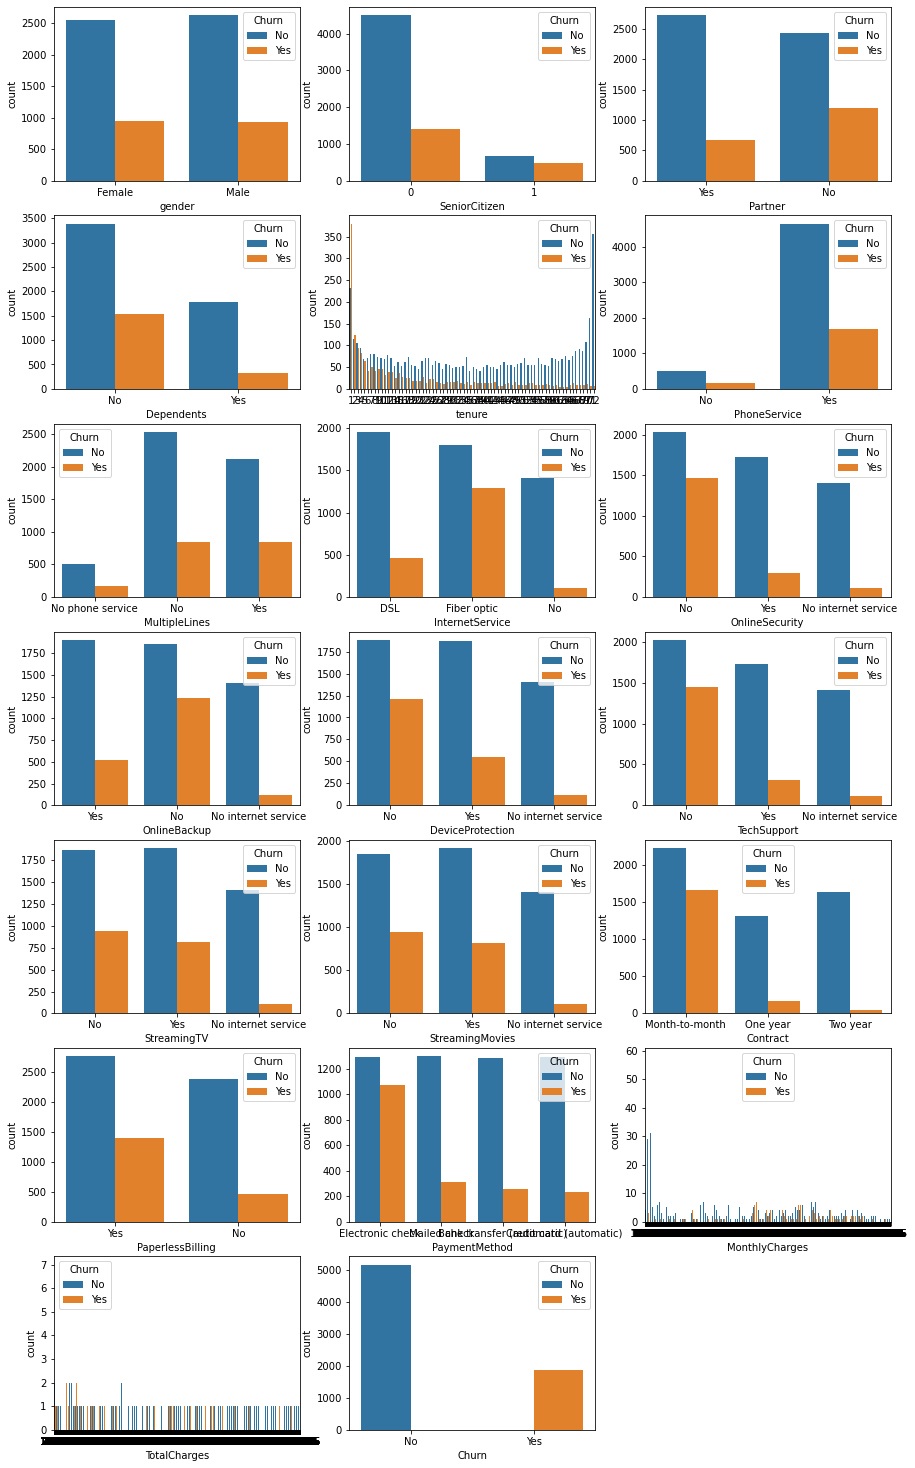

In [114]:
#COUNTPLOT 
plt.figure(figsize=(15,30))
for i in enumerate(df.columns):
    plt.subplot(8,3,i[0]+1)
    sns.countplot(i[1],hue='Churn',data=df) 
    
    #SENIOR CITIZENS ARE LESS CHURNERS 
    #SINGLE PEOPLE ARE MORE CHURNERS 
    #PEOPLE WHO HAVE DEPENDENTS ARE LESS CHURNERS 
    # PEOPLE WITH FIBRE OPTIC CHURN MORE 
    # MONTHLY CONTRACT CUSTOMERS CHURN THE MOST 

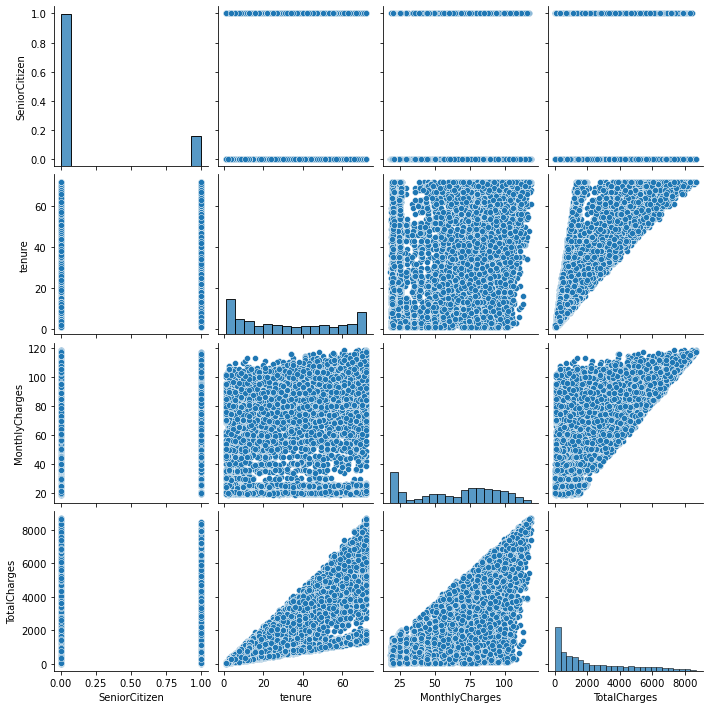

In [115]:
sns.pairplot(df)


# WE CAN SEE THAT THERE IS GOOD RELATION BETWEEN TENURE, MONTHLY CHARGES  WITH TOTAL CHARGES 

In [116]:
# LABEL ENCODE THE TARGET VARIABLE 

from sklearn.preprocessing import LabelEncoder 

In [117]:
le=LabelEncoder()

df['Churn']=le.fit_transform(df['Churn'])

In [118]:
df['Churn']  # checking the encoded column

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32

In [119]:
# USING ONE HOT ENCODER FOR REST OF THE CATEGORICAL DATA 


df=pd.get_dummies(df)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [120]:
# SEE THE CORELATION 
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541,0.001819,-0.001819,-0.016957,0.016957,0.210550,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049,-0.005285,0.005285,-0.381912,0.381912,-0.163386,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858,0.013779,-0.013779,-0.097825,0.097825,0.112343,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000,0.008545,-0.008545,0.149982,-0.149982,0.163128,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,0.001819,-0.005285,0.013779,-0.000048,0.008545,1.000000,-1.000000,-0.001379,0.001379,0.010349,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,-0.001819,0.005285,-0.013779,0.000048,-0.008545,-1.000000,1.000000,0.001379,-0.001379,-0.010349,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
Partner_No,-0.016957,-0.381912,-0.097825,-0.319072,0.149982,-0.001379,0.001379,1.000000,-1.000000,0.452269,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948
Partner_Yes,0.016957,0.381912,0.097825,0.319072,-0.149982,0.001379,-0.001379,-1.000000,1.000000,-0.452269,...,0.118108,-0.280202,0.083067,0.247334,0.013957,-0.013957,0.111406,0.082327,-0.083207,-0.096948
Dependents_No,0.210550,-0.163386,0.112343,-0.064653,0.163128,0.010349,-0.010349,0.452269,-0.452269,1.000000,...,0.038375,0.229715,-0.069222,-0.201699,-0.110131,0.110131,-0.052369,-0.061134,0.149274,-0.056448


<AxesSubplot:>

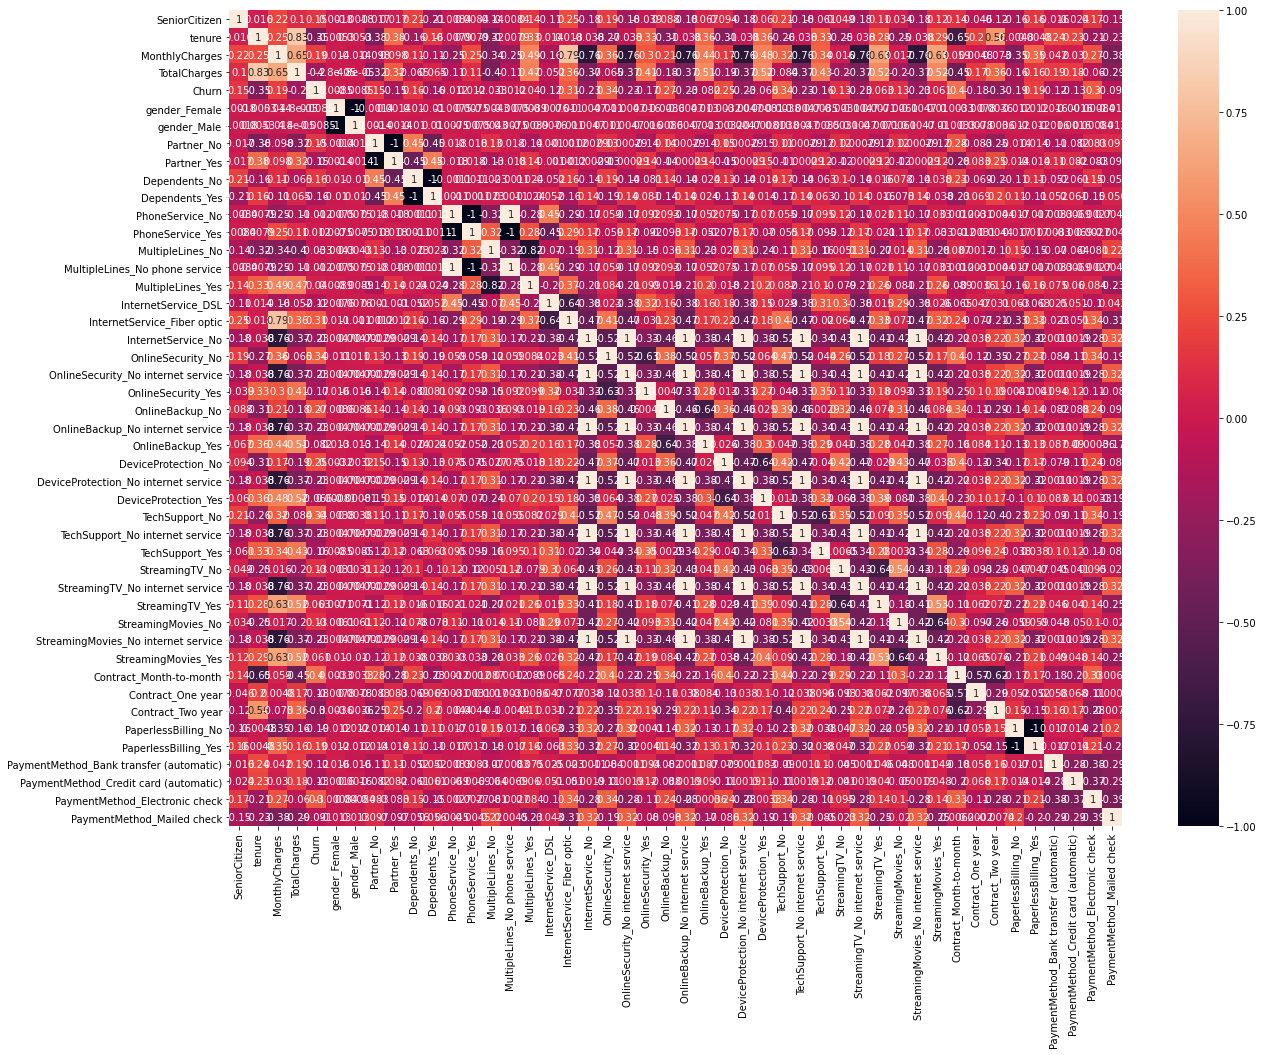

In [121]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [122]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [123]:
# MODEL BUILDING 

In [198]:
# DIVIDING THE DATA INTO X AND Y 

x=df.drop('Churn',axis=1)
y=df['Churn']

In [199]:
x.shape

(7032, 45)

In [200]:
y.shape

(7032,)

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=.25)

In [220]:
#APPLY SMOTE AS THE DATA IS IMBALANCED 

from imblearn.combine import SMOTEENN
smt=SMOTEENN()
x_train,y_train =smt.fit_resample(x,y) 


In [221]:
# applying standard scaler to make the data balance as it has values in diffrent units 


from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(x_train,x_test)
x_train=sc.transform(x_train)
x_test=sc.transform(x_test)

In [222]:
# applying logistic regression 


from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

In [223]:
score_lr=lr.score(x_test,y_test)
score_lr

0.7690557451649602

In [224]:
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

76.90557451649602
[[1010  283]
 [ 123  342]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1293
           1       0.55      0.74      0.63       465

    accuracy                           0.77      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.77      0.78      1758



In [225]:
# applying the cross validation

from sklearn.model_selection import cross_val_score


score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80170576 0.8137882  0.79089616 0.80938834 0.80085349]
0.8033263877725778
0.007867007538564884


In [226]:
#  applying random forest classifier


from sklearn.ensemble import RandomForestClassifier

In [227]:
rfc=RandomForestClassifier()

In [228]:
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,pred))

80.60295790671216
[[1035  258]
 [  83  382]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1293
           1       0.55      0.74      0.63       465

    accuracy                           0.77      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.77      0.78      1758



In [229]:
score_rfc=rfc.score(x_test,y_test)
score_rfc

0.8060295790671217

In [230]:
# applying the cross validation

from sklearn.model_selection import cross_val_score


score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.79459844 0.79033404 0.76813656 0.79871977 0.79800853]
0.7899594690639467
0.011308670684419939


In [231]:
#APPLYING DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [232]:
dtc=DecisionTreeClassifier()

In [233]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [234]:
dtcp=dtc.predict(x_test)
print(accuracy_score(y_test,dtcp)*100)
print(confusion_matrix(y_test,dtcp))
print(classification_report(y_test,dtcp))

80.88737201365188
[[1044  249]
 [  87  378]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1293
           1       0.60      0.81      0.69       465

    accuracy                           0.81      1758
   macro avg       0.76      0.81      0.78      1758
weighted avg       0.84      0.81      0.82      1758



In [235]:
score_dtc=dtc.score(x_test,y_test)
score_dtc

0.8088737201365188

In [236]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.72921109 0.73347548 0.72617354 0.7197724  0.73541963]
0.7288104286533195
0.005554166634097818


In [237]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Score' : [score_lr,score_dtc,score_rfc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree,0.808874
2,Random Forest,0.806030
0,Logistic Regression,0.769056


In [238]:

# SAVING THE BEST MODEL THAT IS DECISION TREE 


import  pickle as pk
file=open('CHURN_PREDICTION.pkl','wb')
pk.dump(dtc,file)

# *CONCLUSION

IN THIS DATA I HAVE DONE PREDICTION FOR IN WHAT CIRCUMSTANCES THE CUSTOMER WILL CHURN OR NOT 
I HAVE LEARNT THE METHOD OF TREATING THE NAAN VALUE
ENCODING TECHNIQUES FOR DIFFRENT KIND OF DATA 
FINDING THE CORELATION 
FINALLY HAVE MADE A PREDICTIVE MODEL TO PREDICT THE CHURN 
